# Introduction

This content has cancer dataset. Cancer cells has a a lot of feaure that you can see features below.

* Logistic Regression, although it is a regression algorithm, it is a classification algorithm and It is one of the basic of artificial neural networks.

* Logistic regression training proceceses was explained with computation graph

## Feauture 

* id                        
* diagnosis(Label)               
* radius_mean              
* texture_mean             
* perimeter_mean           
* area_mean                
* smoothness_mean          
* compactness_mean         
* concavity_mean           
* concave points_mean      
* symmetry_mean            
* fractal_dimension_mean   
* adius_se                
* texture_se               
* perimeter_se             
* area_se                 
* smoothness_se            
* compactness_se         
* concavity_se             
* concave points_se        
* symmetry_se              
* fractal_dimension_se     
* radius_worst             
* texture_worst           
* perimeter_worst          
* area_worst               
* smoothness_worst         
* compactness_worst       
* concavity_worst          
* concave points_worst     
* symmetry_worst           
* fractal_dimension_worst 
* Unnamed: 32

## Content 

* ML preprocessings
  * Tryin to understand data 
  * Encoding labels with LabelEncoder method
  * Implement to variables 
  * Normalization values 
  * Train and test splitting
* Learning Time!  
  * Logistic Regression 
    * Implementing initilazing parameters and sigmoid function
    * Implementing forward and backward propagation 
    * Implementing and update parameters
    * Implementing prediction
    * Implementing Logistic Regression
    * Logistic Regression with sklearn
  * Naive Bayes Classification
  * K neirest neighbor Classification
  * Linear SVM Classification
  * Decision Tree Classification
  * Random Forest Classification
* Comparing Learning algorithms performs
  * Visualization part
  * Confussion matrixes

## Importing libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set_style('dark')
import warnings 
warnings.filterwarnings('ignore')

## Trying to understand data

In [2]:
data = pd.read_csv('Tumor.csv')

In [3]:
# Give a information from data(dtype , features etc..)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
# the data that first five elements 
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# ML Preprocessings

In [5]:
# dropping to feature that we dont need 
data.drop(['id' , 'Unnamed: 32'] , axis = 1 , inplace = True)

#### Encoding labels with LabelEncoder method

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data.iloc[:,0] = le.fit_transform(data.iloc[:,0])

In [7]:
data.head(20)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
5,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440
6,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
7,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
8,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720
9,1,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750


#### Implement to variables

In [8]:
# for label 
y = data.diagnosis.values
# for train and test datas
X_data = data.drop(['diagnosis'] , axis = 1)

In [9]:
X_data

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [10]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

#### Normalization values

In [11]:
# Normalization 
X = (X_data - np.min(X_data)) / (np.max(X_data) - np.min(X_data)).values

In [12]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


#### Train and test splitting

In [13]:
# With sklearn train = %80 , test = %20 
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)

In [14]:
y_train

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,

In [15]:
y_test

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

In [16]:
X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
68,0.096928,0.257694,0.103656,0.045387,0.487226,0.373965,0.733365,0.217445,0.530808,0.642376,...,0.084667,0.283316,0.075153,0.034285,0.508684,0.397018,1.000000,0.601375,0.524936,0.409681
181,0.667755,0.570172,0.683505,0.495228,0.554934,0.809214,0.582709,0.743539,0.674242,0.505897,...,0.667022,0.571962,0.627970,0.467902,0.514627,0.709327,0.541534,0.997595,0.499310,0.481175
63,0.103744,0.140345,0.106489,0.049799,0.221901,0.208975,0.140300,0.108350,0.646970,0.414280,...,0.073995,0.192164,0.075601,0.030697,0.179555,0.136324,0.111581,0.174811,0.338459,0.195855
248,0.173648,0.524518,0.167369,0.086320,0.396678,0.162444,0.055740,0.080268,0.422727,0.280750,...,0.153682,0.617537,0.137308,0.066482,0.519910,0.109158,0.089856,0.210859,0.363493,0.173357
60,0.150930,0.174839,0.143459,0.071432,0.548614,0.187811,0.025398,0.064115,0.850000,0.413648,...,0.109925,0.144723,0.096867,0.045075,0.371987,0.069244,0.017316,0.088625,0.392667,0.165027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.090255,0.166723,0.103656,0.042630,0.408053,0.410159,0.201640,0.142744,0.425253,0.839090,...,0.064141,0.097281,0.060511,0.024381,0.327082,0.209865,0.114537,0.164467,0.135817,0.349993
106,0.220503,0.291512,0.216847,0.114104,0.555836,0.252500,0.165651,0.173211,0.374242,0.320977,...,0.185343,0.459488,0.174810,0.082703,0.644720,0.231598,0.229473,0.418557,0.244628,0.235668
270,0.345923,0.240446,0.321401,0.207466,0.105263,0.022606,0.016987,0.031064,0.226263,0.080034,...,0.248310,0.230011,0.219284,0.122739,0.095754,0.022383,0.030879,0.114536,0.176030,0.040404
435,0.331251,0.335137,0.327068,0.193425,0.481809,0.288080,0.263824,0.321223,0.307576,0.326032,...,0.324084,0.500533,0.316201,0.168133,0.595192,0.319692,0.325000,0.627835,0.318155,0.330972


In [17]:
X_test

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
204,0.259785,0.300643,0.257757,0.143542,0.424483,0.265076,0.187559,0.189911,0.436869,0.290017,...,0.250445,0.336354,0.227302,0.121092,0.471703,0.204238,0.213339,0.348797,0.285630,0.212908
70,0.565999,0.392289,0.551517,0.418452,0.338178,0.256181,0.253046,0.395179,0.263636,0.097936,...,0.602277,0.388060,0.575178,0.413095,0.317837,0.200163,0.214617,0.614777,0.194362,0.071166
131,0.401297,0.330402,0.400180,0.256797,0.510698,0.315686,0.343486,0.401938,0.439899,0.168492,...,0.403059,0.372601,0.370985,0.238596,0.550948,0.205790,0.302796,0.520275,0.250739,0.164961
431,0.256472,0.269530,0.260383,0.137561,0.476393,0.344212,0.181373,0.139115,0.379293,0.443555,...,0.176094,0.290245,0.195229,0.081252,0.487552,0.228590,0.191933,0.253265,0.195348,0.252853
540,0.215770,0.159959,0.213254,0.110032,0.426198,0.284093,0.157849,0.128926,0.382828,0.376158,...,0.154038,0.204158,0.141292,0.066998,0.418213,0.179013,0.143530,0.237732,0.150601,0.172504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,0.362488,0.241461,0.348421,0.221633,0.304956,0.146003,0.121649,0.138718,0.176263,0.075611,...,0.303451,0.357676,0.276856,0.158720,0.284158,0.174356,0.194649,0.269003,0.175439,0.071625
75,0.430167,0.336152,0.416765,0.285981,0.352532,0.198945,0.228889,0.329920,0.372727,0.083193,...,0.421202,0.334222,0.390408,0.255063,0.520571,0.171930,0.225958,0.522337,0.213877,0.057917
249,0.214823,0.176530,0.207864,0.111474,0.439379,0.180050,0.101406,0.145577,0.415657,0.246841,...,0.167912,0.244403,0.151751,0.075354,0.447269,0.127010,0.144089,0.330172,0.216637,0.151187
238,0.342610,0.613460,0.336950,0.203775,0.267220,0.259248,0.258435,0.219085,0.142424,0.238627,...,0.278193,0.760128,0.259425,0.142253,0.243875,0.208895,0.244728,0.282440,0.064065,0.150335


In [18]:
X_train.shape

(455, 30)

In [19]:
X_test.shape

(114, 30)

In [20]:
y_train.shape

(455,)

In [21]:
y_test.shape

(114,)

In [22]:
# Transpoze ıts not necessary but we want to see feature in column
X_train = X_train.T
X_test = X_test.T
y_train = y_train.T
y_test = y_test.T

# Logistic Regression 

#### Implementing initilazing parameters and sigmoid function

In [23]:
# Provideing a function initialize*(1)
def initialize_weight_bias(dimension):
    
    w = np.full((dimension,1) , 0.01)
    b = 0.0
    
    return w , b

initialize_weight_bias(30)

(array([[0.01],
        [0.01],
        [0.01],
        [0.01],
        [0.01],
        [0.01],
        [0.01],
        [0.01],
        [0.01],
        [0.01],
        [0.01],
        [0.01],
        [0.01],
        [0.01],
        [0.01],
        [0.01],
        [0.01],
        [0.01],
        [0.01],
        [0.01],
        [0.01],
        [0.01],
        [0.01],
        [0.01],
        [0.01],
        [0.01],
        [0.01],
        [0.01],
        [0.01],
        [0.01]]),
 0.0)

In [24]:
# Provideing a function sigmoid*(2)
def sigmoid(z):
    sigmoid = 1 / (1 + np.exp(-z)
    
    return sigmoid

sigmoid(100)


SyntaxError: invalid syntax (<ipython-input-24-8c51f2189037>, line 5)

#### Implementing forward and backward propagation

In [ ]:
def forward_backward_propagation(w , b , X_train , y_train):
    # forward propagation
    
    z = np.dot(w.T,X_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/X_train.shape[1]      # x_train.shape[1]  is for scaling
    
    # backward propagation
    derivative_weight = (np.dot(X_train,((y_head-y_train).T)))/X_train.shape[1] # x_train.shape[1]  is for scaling
    derivative_bias = np.sum(y_head-y_train)/X_train.shape[1]                 # x_train.shape[1]  is for scaling
    gradients = {"derivative_weight": derivative_weight, "derivative_bias": derivative_bias}
    
    return cost,gradients

#### Implementing and update parameters

In [ ]:
def update(w, b, X_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    
    # updating(learning) parameters is number_of_iterarion times
    for i in range(number_of_iterarion):
        
        # make forward and backward propagation and find cost and gradients
        
        cost,gradients = forward_backward_propagation(w,b,X_train,y_train)
        
        cost_list.append(cost)
        
        # lets update
        
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
            
    # we update(learn) parameters weights and bias
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

In [ ]:
def predict(w,b,X_test):
    
    # X_test is a input for forward propagation
    z = sigmoid(np.dot(w.T,X_test)+b)
    Y_prediction = np.zeros((1,X_test.shape[1]))
 
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

In [ ]:
def logistic_regression(X_train, y_train, X_test, y_test, learning_rate ,  num_iterations):
    
    # initialize
    dimension =  X_train.shape[0]  # that is 30
    w,b = initialize_weights_and_bias(dimension)
    

    parameters, gradients, cost_list = update(w, b, X_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],X_test)

    # Print test Errors
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    
logistic_regression(X_train, y_train, X_test, y_test,learning_rate = 1, num_iterations = 300)   

#### Logistic Regression with sklearn

In [57]:
from sklearn.linear_model import LogisticRegression
lo_r = LogisticRegression()
lo_r.fit(X_train.T , y_train.T)
print('Acuracy with sklearn library logistic regression : {}'.format(lo_r.score(X_test.T, y_test.T)))
lr_score = lo_r.score(X_test.T, y_test.T)

Acuracy with sklearn library logistic regression : 0.9824561403508771


### Naive Bayes Classification

In [58]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train.T , y_train.T)
print('Acuracy Naive Bayes classification : {}'.format(nb.score(X_test.T , y_test.T)))
nb_score = nb.score(X_test.T , y_test.T)

Acuracy Naive Bayes classification : 0.9649122807017544


### K neirest neighbor classification

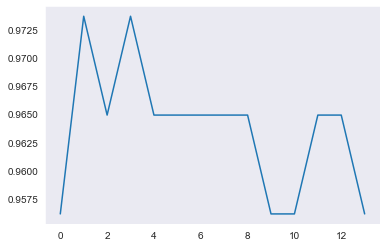

In [48]:
from sklearn.neighbors import KNeighborsClassifier
score_list_knn = []
# finding the best neighbor value
for i in range(1,15):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train.T , y_train.T)
    score_list_knn.append(knn.score(X_test.T , y_test.T))

plt.plot(score_list_knn)
plt.show()
    

* As we can see best neighbor values is 4

In [59]:
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train.T , y_train.T)
print('Acuracy with knn : {}' .format(knn.score(X_test.T , y_test.T)))
knn_score = knn.score(X_test.T , y_test.T)

Acuracy with knn : 0.9736842105263158


### Linear SVM Classification

In [60]:
from sklearn.svm import SVC
svm = SVC(random_state = 42)
svm.fit(X_train.T , y_train.T)
print('Acuracy with Linear SVM :{}'.format(svm.score(X_test.T , y_test.T)))
svm_score = svm.score(X_test.T , y_test.T)

Acuracy with Linear SVM :0.9736842105263158


### Decision Tree Classification

In [61]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train.T , y_train.T)
print('Acuracy with Decision Tree:{}'.format(dt.score(X_test.T , y_test.T)))
dt_score = dt.score(X_test.T , y_test.T)

Acuracy with Decision Tree:0.9385964912280702


### Random Forest Classification 

In [62]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100 , random_state = 42)
rf.fit(X_train.T , y_train.T)
print('Acuracy wit Random forest :{}'.format(rf.score(X_test.T , y_test.T)))
rf_score = rf.score(X_test.T , y_test.T)

Acuracy wit Random forest :0.9649122807017544


# Comparing Learning algorithms performs

## Visualization part

In [63]:
algorithms = ['Logistic Regression' , 'Naive Bayes Classification' , 'K neirest neighbor classification' , 
              'Linear SVM Classification' , 'Decision Tree Classification' , 'Random Forest Classification']
score_algorithms = [lr_score , nb_score , knn_score , svm_score , dt_score , rf_score]

In [66]:
# Creating new data frame for comparing visualaziton
df_score = pd.DataFrame({'Algorithms' : algorithms , 'Scores' : score_algorithms})

,Algorithms,Scores
0,Logistic Regression,0.982456
1,Naive Bayes Classification,0.964912
2,K neirest neighbor classification,0.973684
3,Linear SVM Classification,0.973684
4,Decision Tree Classification,0.938596
5,Random Forest Classification,0.964912


In [73]:
# Sorting 
index = df_score.Scores.sort_values(ascending = False).index
# reindexing
df_score = df_score.reindex(index)

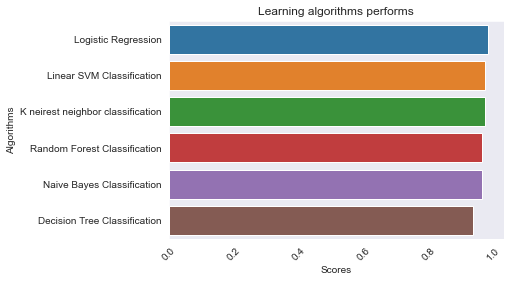

In [74]:
# Visualization part 
sns.barplot(x = 'Scores' , y = 'Algorithms' , data = df_score)
plt.xticks(rotation = 45)
plt.xlabel('Scores')
plt.ylabel('Algorithms')
plt.title('Learning algorithms performs')
plt.show()

## Confusion matrixes

In [81]:
# Logistic Regression predictions
y_pred_lr = lo_r.predict(X_test.T)

# Naive bayes predictions 
y_pred_nb = nb.predict(X_test.T)

# Knn predictions 
y_pred_knn = knn.predict(X_test.T)

# linear svm predictions 
y_pred_svm = svm.predict(X_test.T)

# Decision Tree predictions 
y_pred_dt = dt.predict(X_test.T)

# Random Forest predictions
y_pred_rf = rf.predict(X_test.T)

# True values 
y_true = y_test

In [92]:
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_pred_lr , y_true)
cm_nb = confusion_matrix(y_pred_nb , y_true)
cm_knn = confusion_matrix(y_pred_knn , y_true)
cm_svm = confusion_matrix(y_pred_svm , y_true)
cm_dt = confusion_matrix(y_pred_dt , y_true)
cm_rf = confusion_matrix(y_pred_rf , y_true)

In [117]:
algorithms = ['Logistic Regression' , 'Naive Bayes Classification' , 'K neirest neighbor classification' , 
              'Linear SVM Classification' , 'Decision Tree Classification' , 'Random Forest Classification']
cm = [cm_lr , cm_nb , cm_knn , cm_svm , cm_dt , cm_rf]

def confmatrix_visiulazation(cm , algorithms):
    for i,j in zip(cm,algorithms):
        plt.figure(figsize=(5,5)) 
        sns.heatmap(i , annot = True , linecolor = 'red' , fmt = '.0f')
        plt.xlabel('y_pred')
        plt.ylabel('y_test')
        plt.title('{} confusion map'.format(j))
        plt.show()

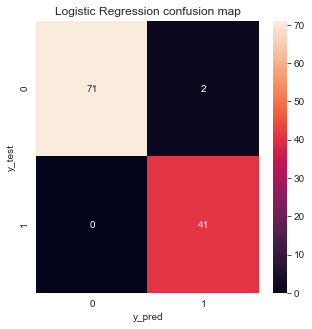

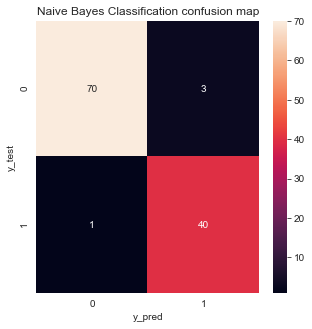

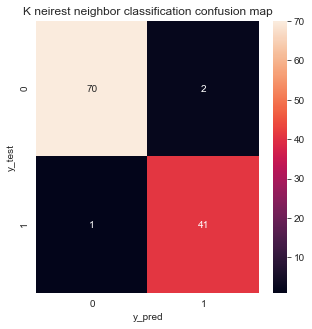

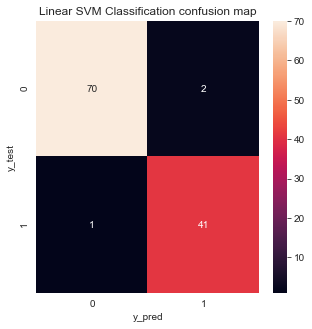

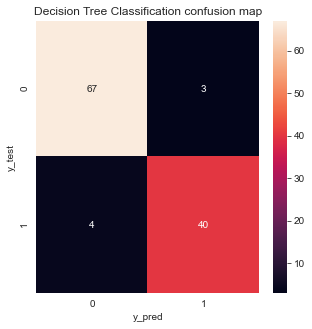

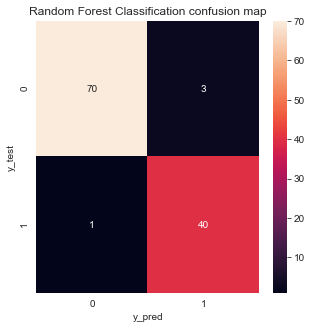

In [118]:
confmatrix_visiulazation(cm , algorithms)

* As we can see TP,TN,FP,FN values for all learning algorithms